In [47]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [48]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [49]:
# hyper params
input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
lr = .001

In [50]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data/', download=True, train=True,
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data/', download=False, train=False,
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


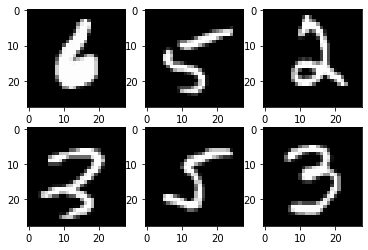

In [51]:
# show images
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [52]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
# be careful of optimizer! It counts!
optimizer = torch.optim.Adam(model.parameters(), lr=lr)



In [53]:
n_total_steps = len(train_loader)

# training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'epoth {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps}, loss = {loss.item():.4f}')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')





epoth 1 / 2, step 100 / 600, loss = 0.3805
epoth 1 / 2, step 200 / 600, loss = 0.3193
epoth 1 / 2, step 300 / 600, loss = 0.2520
epoth 1 / 2, step 400 / 600, loss = 0.2390
epoth 1 / 2, step 500 / 600, loss = 0.1901
epoth 1 / 2, step 600 / 600, loss = 0.1140
epoth 2 / 2, step 100 / 600, loss = 0.1598
epoth 2 / 2, step 200 / 600, loss = 0.1019
epoth 2 / 2, step 300 / 600, loss = 0.0559
epoth 2 / 2, step 400 / 600, loss = 0.0726
epoth 2 / 2, step 500 / 600, loss = 0.1884
epoth 2 / 2, step 600 / 600, loss = 0.1122
Accuracy of the network on the 10000 test images: 96.98 %
